In [1]:
# Importação das bibliotecas necessárias

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


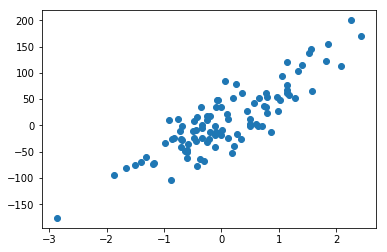

In [6]:
# Criando dados de regressão
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 100, n_features = 1, noise = 30, random_state = 5)

plt.scatter(X, Y)
plt.show()

In [7]:
# Função que retorna os resultados do modelo
def retornaResultadosModeloKNN_Regressao(random_state, quantidade, dados, respostas):
    #Divisão entre observações de teste e observações de treino
    X_train, X_test, y_train, y_test = train_test_split(dados, respostas, random_state = random_state)
    # Vetores de armazenamento dos resultados de teste e de treino
    quantidade_k = range(1,quantidade + 1)
    res_teste = []
    res_treino = []
    
    # loop das classificações

    for i in quantidade_k:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(X_train, y_train)

        # Adicionando os valores dos resultados a seus respectivos vetores
        res_treino.append(knn.score(X_train, y_train))
        res_teste.append(knn.score(X_test, y_test))
        
    return quantidade_k, res_treino, res_teste

In [8]:
# Print de alguns resultados
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(5, 20, X, Y)
i = 4
print("Treino {} : {}".format(i, res_treino[i]))
print("Teste {} : {}".format(i, res_teste[i]))

Treino 4 : 0.7855761526378089
Teste 4 : 0.6896791255475445


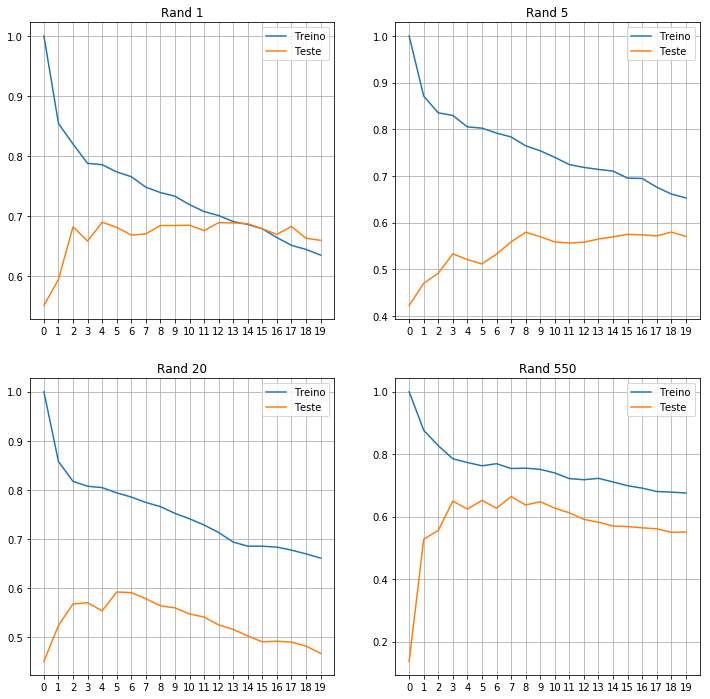

In [10]:
# Plot dos gráficos com os seguintes randoms 1, 5, 20, 550
dados = X
respostas = Y

legendas = ["Treino", "Teste"]
quantidade = 20
rand = 1
f, axarr = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = [12,12]
plt.setp(axarr, xticks=np.arange(0,20, step=1))
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
axarr[0,0].plot(res_treino)
axarr[0,0].plot(res_teste)
axarr[0,0].grid(True)
axarr[0,0].set_title("Rand 1")
axarr[0,0].legend(legendas)

# Rand 5
rand = 5
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
axarr[0,1].plot(res_treino)
axarr[0,1].plot(res_teste)
axarr[0,1].grid(True)
axarr[0,1].set_title("Rand 5")
axarr[0,1].legend(legendas)

#Rand 20
rand = 20
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
axarr[1,0].plot(res_treino)
axarr[1,0].plot(res_teste)
axarr[1,0].grid(True)
axarr[1,0].set_title("Rand 20")
axarr[1,0].legend(legendas)

#Rand 550
rand = 550
quantidade_k, res_treino, res_teste = retornaResultadosModeloKNN_Regressao(rand, quantidade, dados, respostas)
axarr[1,1].plot(res_treino)
axarr[1,1].plot(res_teste)
axarr[1,1].grid(True)
axarr[1,1].set_title("Rand 550")
axarr[1,1].legend(legendas)

#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()